In [1]:
%pylab inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
def generateOUprocess(T=10000.0, tau=3.0, mu=0.0, sigma=1.0, dt=0.1):
    """Function to generate OU process from an input excitation time, here just set as 
    100000 ms as in the paper by Pozzorini"""
    
    T_in = int(T/dt) #getting the excitation time in terms of an integer
    
    white_noise = np.random.randn(T_in)
      
    OU_process = np.zeros(T_in)
    
    OU_c1 = dt/tau # convenient constants
    OU_c2 = np.sqrt(2.0*dt/tau)
    
    for t in range(T_in-1):
        OU_process[t+1] = OU_process[t] + (mu - OU_process[t])*OU_c1 + sigma*OU_c2*white_noise[t] 
        
    I = OU_process*sigma + mu
    
    return I

(0, 1000)

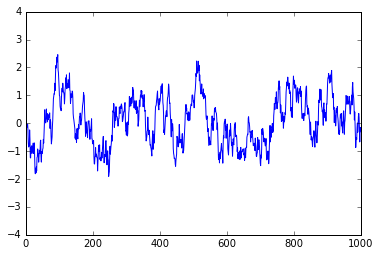

In [3]:
plt.plot(generateOUprocess(mu=0))
plt.xlim(0,1000)

In [4]:
generateOUprocess(mu=4).mean()

7.9963417558004721

In [5]:
generateOUprocess(sigma=2).std()

4.0487825601016114

- __mean and standard deviation do not match. Please correct!__